## Final Project
Ying Huang

In [1]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

## Article clean-up and filtering

In [126]:
news = pd.read_pickle('news_chicago_il.pkl')
news = news[news['language']=='english']
news

,crawled_date,language,text,title
0,2019-10-31,english,"News October 31st, 2019 by Ric Hanson\nCEDAR RAPIDS, Iowa (AP) — Authorities say an Illinois man was targeted and fatally shot at an eastern Iowa convenience store. The shooting was reported a lit...","Police say Illinois man targeted, killed in eastern Iowa"
1,2019-10-31,english,Chicago's teachers union voted to approve a tentative contract agreement with city officials Wednesday but refused to end a strike that has canceled two weeks of classes unless the city's mayor ad...,Chicago teachers strike continues with tentative contract
2,2019-10-31,english,"News KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali ""We've seen fires and tragedies where people have believed they could stay. Do not do that. The only thing you cannot replace is yo...",KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali
3,2019-10-31,english,"You may have noticed that markets are taking a beating. The Dow plunged over 200 points after the Chicago PMI dropped to 43.2, its lowest level since December 2015.\nJim Cramer noted the weak data...",Jim Cramer Explains Why Markets Tanked on Weak Chicago PMI Data
4,2019-10-31,english,"Anxious students feeling pinch amid Chicago teachers' strike by Kathleen Foody, The Associated Press Posted Oct 31, 2019 11:15 am EDT World Striking Chicago Teachers Union members and their suppor...",Anxious students feeling pinch amid Chicago teachers’ strike
...,...,...,...,...
49117,2019-11-02,english,Chicago teen charged in Halloween shooting of... Copyright rights reserved.,Chicago teen charged in Halloween shooting of 7-year-old
49118,2019-11-02,english,"Javon Williams Jr. ran for two touchdowns and Nico Gauldoni kicked three field goals as Southern Illinois beat Indiana State, 23-17 in a Missouri Valley Football Conference battle Saturday afterno...","Williams, Southern Illinois run past Indiana State, 23-14"
49119,2019-11-02,english,"A 15-year-old boy was charged Friday night with attempted murder in the suspected gang-related shooting of two people on Chicago's West Side, including a 7-year-old girl out trick-or-treating in a...",Teenager charged with shooting Chicago 7-year-old trick-or-treater
49120,2019-11-02,english,"Freshman QB Will McElvain threw 3 TDs in the impressive 27-10 win for the Panthers Share {copyShortcut} to copy Link copied! Updated: 6:28 PM CDT Nov 2, 2019 Sports Director Ninth-ranked UNI footb...",#9 UNI blasts #7 Illinois State


In [127]:
news['population'] =  news['text'].apply(lambda x: bool(re.search('[pP]opulation',x)))
news = news[news['population'] == True]
news.drop_duplicates(subset = 'title',inplace=True)
news.reset_index(inplace=True,drop=True)
news.head(5)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,crawled_date,language,text,title,population
0,2019-10-31,english,"News KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali ""We've seen fires and tragedies where people have believed they could stay. Do not do that. The only thing you cannot replace is yo...",KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali,True
1,2019-10-31,english,"Reprints Print Century 21 Pride Realty\nThis new house on Holland Harbor Drive in the Lighthouse Pointe development in Frankfort sold for $534,900 in August.\nSales of new-construction homes have ...",Sales of new homes in Chicago area stagnant so far this year,True
2,2019-10-31,english,"Why pressure on property taxes is growing in Illinois amid pension burden The cost of public safety pensions has limited the number of financial options for the city of Waukegan, which finances op...",Why pressure on property taxes is growing in Illinois amid pension burden,True
3,2019-10-31,english,"Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts October 30, 2019 | : Print\nA recent period of higher education cutbacks in Illinois has created affordability a...",Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts - Higher Education,True
4,2019-10-31,english,"Download Wirepoints’ accompanying handout: “Chicago’s Financial Crisis”\nToday, we are here to talk about the city’s 2020 budget, but I’d argue that’s the wrong way to look at this crisis.\nIt see...","Wirepoints’ speech to the City Club of Chicago: “By focusing on Chicago’s one-year budget, it’s like we’re treating an intensive care patient with an aspirin.”",True


In [4]:
pd.set_option('display.max_colwidth', 200)
#remove /n
news['text'] = news['text'].map(lambda x: re.sub(r'\n', '. ', str(x)))
news['text'] = news['text'].map(lambda x: re.sub(r'\.', '. ', str(x)))
df = news[['text','title']]
df.head(5)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,title
0,"News KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali ""We've seen fires and tragedies where people have believed they could stay. Do not do that. The only thing you cannot replace is...",KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali
1,"Reprints Print Century 21 Pride Realty. This new house on Holland Harbor Drive in the Lighthouse Pointe development in Frankfort sold for $534,900 in August. . Sales of new-construction homes ha...",Sales of new homes in Chicago area stagnant so far this year
2,"Why pressure on property taxes is growing in Illinois amid pension burden The cost of public safety pensions has limited the number of financial options for the city of Waukegan, which finances op...",Why pressure on property taxes is growing in Illinois amid pension burden
3,"Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts October 30, 2019 | : Print. A recent period of higher education cutbacks in Illinois has created affordability ...",Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts - Higher Education
4,"Download Wirepoints’ accompanying handout: “Chicago’s Financial Crisis”. Today, we are here to talk about the city’s 2020 budget, but I’d argue that’s the wrong way to look at this crisis. . It ...","Wirepoints’ speech to the City Club of Chicago: “By focusing on Chicago’s one-year budget, it’s like we’re treating an intensive care patient with an aspirin.”"


### Summarization

In [5]:
 #!pip install sumy --user

In [6]:
from gensim.summarization.summarizer import summarize
#from sumy.parsers.plaintext import PlaintextParser
#from sumy.nlp.tokenizers import Tokenizer
#from sumy.summarizers.lex_rank import LexRankSummarizer 

In [7]:
def summary(x, ratio):
    try:
        return summarize(x,ratio=ratio)
    except:
        return '1'

In [8]:
df['summarize'] = df['text'].apply(lambda x: summary(x, ratio=0.1))
df = df[df['summarize'] != '1'].reset_index(drop=True)
df.head()

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,title,summarize
0,"News KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali ""We've seen fires and tragedies where people have believed they could stay. Do not do that. The only thing you cannot replace is...",KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali,"KnowThis: The people hit hardest by these natural and man-made disasters are those who are already vulnerable: homeless populations, the elderly, low-income populations without access to emergency..."
1,"Reprints Print Century 21 Pride Realty. This new house on Holland Harbor Drive in the Lighthouse Pointe development in Frankfort sold for $534,900 in August. . Sales of new-construction homes ha...",Sales of new homes in Chicago area stagnant so far this year,". Sales of new-construction homes have been flat in much of 2019 compared to a year ago, according to a third-quarter report released today by a Schaumburg-based consultancy for homebuilders.\n. ..."
2,"Why pressure on property taxes is growing in Illinois amid pension burden The cost of public safety pensions has limited the number of financial options for the city of Waukegan, which finances op...",Why pressure on property taxes is growing in Illinois amid pension burden,"Why pressure on property taxes is growing in Illinois amid pension burden The cost of public safety pensions has limited the number of financial options for the city of Waukegan, which finances op..."
3,"Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts October 30, 2019 | : Print. A recent period of higher education cutbacks in Illinois has created affordability ...",Reports: Underrepresented Students at Illinois Institutions Impacted by Budget Cuts - Higher Education,. “We rarely talk about the impact on students and we rarely talk about the ways in which the state of Illinois really retreating from it’s historic investment in higher education has impacted th...
4,"Download Wirepoints’ accompanying handout: “Chicago’s Financial Crisis”. Today, we are here to talk about the city’s 2020 budget, but I’d argue that’s the wrong way to look at this crisis. . It ...","Wirepoints’ speech to the City Club of Chicago: “By focusing on Chicago’s one-year budget, it’s like we’re treating an intensive care patient with an aspirin.”","Today, we are here to talk about the city’s 2020 budget, but I’d argue that’s the wrong way to look at this crisis.\n. It seems to me that everybody, every year, treats the city’s one-year budget..."


## Topic detection

In [9]:
#!pip install pyLDAvis

In [9]:
import pyLDAvis.gensim
from gensim.models.ldamulticore import LdaMulticore
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora, models
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
newslist = df['text'].tolist()
sumlist = df['summarize'].tolist()

In [11]:
#clean the news articles
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    fdist = nltk.FreqDist(normalized)
    common = fdist.most_common(round(len(fdist)*0.1))
    
    reduced = ''.join(w for w in normalized if w not in common) #also remove most common 20 words from the corpus.
    return reduced

In [12]:
text_clean = [clean(doc).split() for doc in newslist]
sum_clean = [clean(doc).split() for doc in sumlist]
len(sum_clean)

886

#### Topic generated by summary

In [13]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(sum_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
%time sum_term_matrix = [dictionary.doc2bow(doc) for doc in sum_clean]

CPU times: user 86.9 ms, sys: 2.35 ms, total: 89.3 ms
Wall time: 89.4 ms


In [15]:
%time ldamodel = LdaMulticore(sum_term_matrix, num_topics=5, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=5, num_words=10), sep='\n')

CPU times: user 36.1 s, sys: 666 ms, total: 36.8 s
Wall time: 50.7 s
(0, '0.017*"chicago" + 0.012*"illinois" + 0.011*"city" + 0.010*"tax" + 0.008*"state" + 0.007*"year" + 0.007*"community" + 0.006*"said" + 0.005*"pension" + 0.004*"new"')
(1, '0.010*"health" + 0.008*"medical" + 0.006*"team" + 0.006*"work" + 0.006*"service" + 0.006*"development" + 0.006*"program" + 0.006*"research" + 0.005*"support" + 0.005*"provide"')
(2, '0.009*"said" + 0.006*"new" + 0.005*"chicago" + 0.005*"year" + 0.004*"community" + 0.003*"center" + 0.003*"health" + 0.003*"state" + 0.003*"care" + 0.003*"people"')
(3, '0.006*"illinois" + 0.006*"said" + 0.005*"people" + 0.005*"state" + 0.004*"new" + 0.004*"time" + 0.004*"year" + 0.004*"medical" + 0.004*"center" + 0.003*"publishing"')
(4, '0.022*"chicago" + 0.020*"school" + 0.018*"teacher" + 0.011*"union" + 0.009*"strike" + 0.009*"student" + 0.008*"said" + 0.007*"city" + 0.006*"public" + 0.006*"year"')


In [15]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, sum_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [17]:
%time ldamodel = LdaMulticore(sum_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=10), sep='\n')

CPU times: user 35.8 s, sys: 712 ms, total: 36.5 s
Wall time: 49.7 s
(0, '0.031*"school" + 0.029*"teacher" + 0.029*"chicago" + 0.018*"union" + 0.014*"strike" + 0.012*"student" + 0.011*"city" + 0.009*"said" + 0.009*"mayor" + 0.009*"district"')
(1, '0.009*"health" + 0.008*"service" + 0.007*"care" + 0.007*"community" + 0.007*"work" + 0.007*"program" + 0.006*"business" + 0.006*"experience" + 0.005*"new" + 0.005*"year"')
(2, '0.014*"community" + 0.012*"chicago" + 0.008*"illinois" + 0.007*"city" + 0.007*"investment" + 0.006*"business" + 0.005*"small" + 0.005*"budget" + 0.005*"neighborhood" + 0.005*"job"')
(3, '0.006*"chicago" + 0.006*"setigerum" + 0.005*"new" + 0.005*"somniferum" + 0.005*"year" + 0.004*"said" + 0.004*"hybrid" + 0.004*"plant" + 0.004*"uf" + 0.004*"product"')
(4, '0.013*"medical" + 0.010*"health" + 0.010*"outcome" + 0.008*"u" + 0.007*"support" + 0.007*"illinois" + 0.007*"information" + 0.006*"development" + 0.006*"state" + 0.006*"provide"')
(5, '0.011*"chicago" + 0.009*"medica

In [18]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, sum_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

#### Topic generated by whole text

In [16]:
dictionary2 = corpora.Dictionary(text_clean)
text_term_matrix = [dictionary2.doc2bow(doc) for doc in text_clean]

In [20]:
%time ldamodel = LdaMulticore(text_term_matrix, num_topics=5, id2word = dictionary2, passes=50)
print(*ldamodel.print_topics(num_topics=5, num_words=10), sep='\n')

CPU times: user 1min 46s, sys: 1.5 s, total: 1min 47s
Wall time: 2min 21s
(0, '0.015*"illinois" + 0.010*"tax" + 0.010*"said" + 0.010*"state" + 0.010*"chicago" + 0.009*"school" + 0.009*"year" + 0.007*"teacher" + 0.007*"city" + 0.006*"population"')
(1, '0.018*"school" + 0.013*"teacher" + 0.012*"chicago" + 0.011*"student" + 0.010*"said" + 0.009*"strike" + 0.008*"union" + 0.005*"city" + 0.005*"year" + 0.005*"education"')
(2, '0.010*"said" + 0.005*"market" + 0.005*"u" + 0.005*"”" + 0.004*"illinois" + 0.004*"new" + 0.004*"bat" + 0.003*"s" + 0.003*"year" + 0.003*"state"')
(3, '0.013*"chicago" + 0.006*"city" + 0.006*"said" + 0.005*"people" + 0.005*"state" + 0.005*"”" + 0.004*"police" + 0.004*"year" + 0.004*"illinois" + 0.004*"one"')
(4, '0.009*"health" + 0.007*"job" + 0.006*"medical" + 0.006*"experience" + 0.006*"community" + 0.006*"work" + 0.006*"chicago" + 0.005*"program" + 0.005*"care" + 0.005*"business"')


In [21]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, text_term_matrix, dictionary2, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [22]:
%time ldamodel = LdaMulticore(text_term_matrix, num_topics=10, id2word = dictionary2, passes=50)
print(*ldamodel.print_topics(num_topics=10, num_words=10), sep='\n')

CPU times: user 1min 51s, sys: 1.67 s, total: 1min 52s
Wall time: 2min 27s
(0, '0.028*"school" + 0.024*"teacher" + 0.016*"chicago" + 0.015*"said" + 0.014*"strike" + 0.013*"union" + 0.013*"student" + 0.007*"city" + 0.006*"year" + 0.006*"district"')
(1, '0.014*"percent" + 0.013*"illinois" + 0.013*"student" + 0.011*"state" + 0.007*"school" + 0.007*"said" + 0.007*"college" + 0.007*"year" + 0.006*"population" + 0.005*"2017"')
(2, '0.009*"chicago" + 0.008*"job" + 0.008*"community" + 0.007*"work" + 0.007*"program" + 0.007*"health" + 0.007*"experience" + 0.005*"care" + 0.005*"service" + 0.004*"business"')
(3, '0.011*"home" + 0.009*"illinois" + 0.009*"average" + 0.008*"market" + 0.007*"list" + 0.007*"2019" + 0.007*"price" + 0.005*"food" + 0.005*"chicago" + 0.005*"said"')
(4, '0.012*"city" + 0.012*"tax" + 0.011*"illinois" + 0.010*"chicago" + 0.009*"state" + 0.009*"pension" + 0.006*"year" + 0.006*"said" + 0.005*"government" + 0.004*"people"')
(5, '0.010*"chicago" + 0.007*"said" + 0.006*"people" +

In [23]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, text_term_matrix, dictionary2, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

It turns out that the articles are not all about Illinios population, but also about teacher strike, food law, state tax, health, jobs... 

Thus, classification is still needed for the further analysis. 

### Classification
Try to look at the first 50 articles and label them. First try to classify whether the remaining 886 articles talk about Illinios population or not.

In [24]:
#Random Shuffle. 
df = df.sample(frac=1).reset_index(drop=True)

In [37]:
#train = pd.read_csv('train')
#test = pd.read_csv('test')
#train = train.iloc[:,1:4]
#test = test.iloc[:,1:4]

Now, my training set will be the first 50 articlels

In [38]:
#train = df.iloc[0:50,:]
#test = df.iloc[50:,:]
print(train.shape)
print(test.shape)

(50, 3)
(836, 3)


In [39]:
y_pop = [1,1,0,0,0,0,0,0,0,1,
         1,0,0,0,0,0,0,0,1,0,
         1,0,0,0,0,0,0,1,0,0,
         0,0,0,0,0,0,0,0,0,0,
         0,0,0,1,0,0,0,0,0,0]
len(y_pop)

50

In [40]:
#train['text'][46]

In [41]:
y_sent = [-1,-1,1,-1,1,1,1,1,-1,-1,
          -1,1,-1,1,1,1,-1,1,-1,1,
          -1,1,1,1,-1,-1,1,-1,-1,1,
          1,-1,-1,-1,1,-1,1,1,-1,1,
          -1,1,1,-1,1,-1,-1,1,1,1]
len(y_sent)

50

Train for the topic binary classification.

In [42]:
X = train.text
X_holdout = test.text
#??still need split?
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_pop, test_size = 0.2, random_state=0)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

In [43]:
#Naive Bayes
nb = MultinomialNB() 
#Logistic regression
logreg = LogisticRegression()
#Support Vector Machine
svm = SGDClassifier(max_iter=100, tol=None)

classifiers = [('Logistic Regression', logreg), ('Naive Bayes', nb),('SVM',svm)]


In [52]:
def cal(classifier, X_train_trans, X_test_trans):
    for clf_name, clf in classifiers:
        clf.fit(X_train_trans, y_train)
        y_pred_class = clf.predict(X_test_trans)
        print(clf_name,":", metrics.accuracy_score(y_test, y_pred_class))
        print(metrics.confusion_matrix(y_test, y_pred_class))

In [44]:
#Count Vector
vect = CountVectorizer(stop_words='english',analyzer='word', ngram_range=(1,3),
                       max_df=0.8, min_df=0.2, max_features=1000)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [45]:
cal(classifiers,X_train_dtm,X_test_dtm)

Logistic Regression : 0.8
[[7 1]
 [1 1]]
Naive Bayes : 0.7
[[5 3]
 [0 2]]
SVM : 0.8
[[7 1]
 [1 1]]


In [53]:
#TFID
tfid = TfidfVectorizer(stop_words='english')
X_train_tfid = tfid.fit_transform(X_train)
X_test_tfid = tfid.transform(X_test)

In [54]:
cal(classifiers,X_train_tfid,X_test_tfid)

Logistic Regression : 0.8
[[8 0]
 [2 0]]
Naive Bayes : 0.8
[[8 0]
 [2 0]]
SVM : 0.9
[[8 0]
 [1 1]]


For me, the result from SVM after Tfid Vevtorize gives the best result. However, I only have 50 labeled data, and 40 to train after train-test split. The result is much close. The next step is definitely have more labeled data as I can.

In [55]:
y_pred_pop = svm.predict(tfid.transform(X_holdout))

In [56]:
##concate test dataset with the predict result.
test['population'] = y_pred_pop
train['population'] = y_pop
df2 = pd.concat([train,test],axis=0)
df_l =  df2[df2['population']==1]
df_l.head()

,text,title,summarize,population
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1
9,Regarding the editorial “Chicago and Illinois don’t have enough taxpayers to pay for all this” (Oct. 6): Can the Tribune Editorial Board read the reporting in its own paper and stop referring to ...,Letters: Is there truly an ‘exodus’ from Illinois?,"Teachers need prep time I was surprised and disappointed to read the Tribune Editorial Board’s sarcastic and condescending tone in the Oct.\nWell, students would be receiving teacher time if all s...",1
10,"23. By: Mark Glennon*. For starters, you’d hope a Nobel Prize winning economist would base his case on numbers remotely close to accurate. . But Roger Myerson isn’t even in the ballpark – he’s ...",The Dumbest Case Yet For Illinois’ ‘Fair Tax’ Is By A Nobel Economist,"Apply that to all pensions, add healthcare and you’d get about $670 billion – five times worse than Myerson says.\n. His case is based on pension obligations, taxes to pay for them and property v...",1
18,"Weekend Watch: Illinois' population change Share: WLS CHICAGO (WLS) -- Our Weekend Watch shines a spotlight on government activity. According to the Better Government Association, in a recent inte...",Weekend Watch: Illinois' population change,NaN,1


In [57]:
df_l.shape

(35, 4)

In [58]:
df2.shape

(886, 4)

There are only 27 articles is classified as relevant to the topic, based on the training data that I labeled. 

That's a total of 35 articles that is closely related to the topic we want to examine.
#### Generate word cloud for those relevant articles

In [59]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [60]:
newslist2 = df_l['text'].tolist()
text_clean2 = [clean(doc).split() for doc in newslist2]

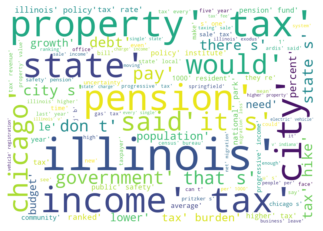

In [61]:
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(text_clean2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [62]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [66]:
df2['polarity'] = df2.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
#df2['subjectivity'] = df2.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
df2['polarity_sum'] = df2.apply(lambda x: TextBlob(x['summarize']).sentiment.polarity, axis=1)
#df2['subjectivity_sum'] = df2.apply(lambda x: TextBlob(x['summarize']).sentiment.subjectivity, axis=1)
df2.head(5)

,text,title,summarize,population,polarity,polarity_sum
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1,0.076417,0.250947
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1,0.127796,0.153125
2,"By Press release submission | Nov 5, 2019. Illinois 51 announcement on Nov. 4. It is heartwarming to know we have such generous constituents. My office was so full of donations we were able to...","ILLINOIS STATE HOUSE DISTRICT 51: ""Lake County Haven is empowering homeless women and their children to achieve permanent, independent living.""",,0,0.243750,0.000000
3,History / Paranormal / Politics The horrors—real and imagined—of a weekend in Trump’s southern Illinois Posted By Ryan Smith on 02. 17. 17 at 02:37 PM. Sign up for our newsletters Subscribe click...,Re: The horrors—real and imagined—of a weekend in Trump’s southern Illinois,"Sign up for our newsletters Subscribe click to enlarge Ryan Smith A cabin near Herod, Illinois I half expected to hear the groans of one of the anguished apparitions rumored to haunt Cave-in-Rock ...",0,0.030385,0.071313
4,"November 08, 2019 01:30 PM Homes for Sale in Grayslake , Illinois - November 2019 Grayslake is a village in Lake County in the U. S. state of Illinois. It is located approximately 40 miles north...","Homes for Sale in Grayslake, Illinois - November 2019",,0,-0.153571,0.000000


In [67]:
def map(x):
    if x < 0:
        return -1
    elif  x == 0:
        return 0
    else:
        return 1

df2['sentiment_text'] = df2.polarity.apply(lambda x: map(x) )
df2['sentiment_sum'] = df2.polarity_sum.apply(lambda x: map(x) )
df2.head()

,text,title,summarize,population,polarity,polarity_sum,sentiment_text,sentiment_sum
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1,0.076417,0.250947,1,1
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1,0.127796,0.153125,1,1
2,"By Press release submission | Nov 5, 2019. Illinois 51 announcement on Nov. 4. It is heartwarming to know we have such generous constituents. My office was so full of donations we were able to...","ILLINOIS STATE HOUSE DISTRICT 51: ""Lake County Haven is empowering homeless women and their children to achieve permanent, independent living.""",,0,0.243750,0.000000,1,0
3,History / Paranormal / Politics The horrors—real and imagined—of a weekend in Trump’s southern Illinois Posted By Ryan Smith on 02. 17. 17 at 02:37 PM. Sign up for our newsletters Subscribe click...,Re: The horrors—real and imagined—of a weekend in Trump’s southern Illinois,"Sign up for our newsletters Subscribe click to enlarge Ryan Smith A cabin near Herod, Illinois I half expected to hear the groans of one of the anguished apparitions rumored to haunt Cave-in-Rock ...",0,0.030385,0.071313,1,1
4,"November 08, 2019 01:30 PM Homes for Sale in Grayslake , Illinois - November 2019 Grayslake is a village in Lake County in the U. S. state of Illinois. It is located approximately 40 miles north...","Homes for Sale in Grayslake, Illinois - November 2019",,0,-0.153571,0.000000,-1,0


In [68]:
X = train.text
X_holdout = test.text
X_train, X_test, y_train, y_test = train_test_split(X, y_sent, test_size = 0.2, random_state=0)
cal(classifiers,X_train_tfid,X_test_tfid)

Logistic Regression : 0.8
[[4 1]
 [1 4]]
Naive Bayes : 0.8
[[5 0]
 [2 3]]
SVM : 0.8
[[5 0]
 [2 3]]


In [69]:
y_pred_sent = logreg.predict(tfid.transform(X_holdout))

In [70]:
sent = y_sent+list(y_pred_sent)
len(sent)

886

In [71]:
df2['label_sent'] = sent
df2.head()

,text,title,summarize,population,polarity,polarity_sum,sentiment_text,sentiment_sum,label_sent
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1,0.076417,0.250947,1,1,-1
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1,0.127796,0.153125,1,1,-1
2,"By Press release submission | Nov 5, 2019. Illinois 51 announcement on Nov. 4. It is heartwarming to know we have such generous constituents. My office was so full of donations we were able to...","ILLINOIS STATE HOUSE DISTRICT 51: ""Lake County Haven is empowering homeless women and their children to achieve permanent, independent living.""",,0,0.243750,0.000000,1,0,1
3,History / Paranormal / Politics The horrors—real and imagined—of a weekend in Trump’s southern Illinois Posted By Ryan Smith on 02. 17. 17 at 02:37 PM. Sign up for our newsletters Subscribe click...,Re: The horrors—real and imagined—of a weekend in Trump’s southern Illinois,"Sign up for our newsletters Subscribe click to enlarge Ryan Smith A cabin near Herod, Illinois I half expected to hear the groans of one of the anguished apparitions rumored to haunt Cave-in-Rock ...",0,0.030385,0.071313,1,1,-1
4,"November 08, 2019 01:30 PM Homes for Sale in Grayslake , Illinois - November 2019 Grayslake is a village in Lake County in the U. S. state of Illinois. It is located approximately 40 miles north...","Homes for Sale in Grayslake, Illinois - November 2019",,0,-0.153571,0.000000,-1,0,1


In [72]:
df2['sent'] = df2['label_sent']*0.6 + df2['sentiment_text']*0.2+df2['sentiment_sum']*0.2
df2['sent'] = df2.sent.apply(lambda x: -1 if x < 0 else 1)
df2 = df2[['text','title','summarize','population','sent']]
df2.head()

,text,title,summarize,population,sent
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1,-1
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1,-1
2,"By Press release submission | Nov 5, 2019. Illinois 51 announcement on Nov. 4. It is heartwarming to know we have such generous constituents. My office was so full of donations we were able to...","ILLINOIS STATE HOUSE DISTRICT 51: ""Lake County Haven is empowering homeless women and their children to achieve permanent, independent living.""",,0,1
3,History / Paranormal / Politics The horrors—real and imagined—of a weekend in Trump’s southern Illinois Posted By Ryan Smith on 02. 17. 17 at 02:37 PM. Sign up for our newsletters Subscribe click...,Re: The horrors—real and imagined—of a weekend in Trump’s southern Illinois,"Sign up for our newsletters Subscribe click to enlarge Ryan Smith A cabin near Herod, Illinois I half expected to hear the groans of one of the anguished apparitions rumored to haunt Cave-in-Rock ...",0,-1
4,"November 08, 2019 01:30 PM Homes for Sale in Grayslake , Illinois - November 2019 Grayslake is a village in Lake County in the U. S. state of Illinois. It is located approximately 40 miles north...","Homes for Sale in Grayslake, Illinois - November 2019",,0,1


In [73]:
df_pos = df2[df2['sent'] == 1]
df_neg = df2[df2['sent'] == -1]
print(df_pos.shape)
df_neg.shape

(585, 5)


(301, 5)

In [74]:
df_l = df2[df2['population']==1]
df_l.head(10)

,text,title,summarize,population,sent
0,"Illinois is second to Alaska in net outbound migration. Many move out, but few move in. Behind the Chatter. Please consider the Chicago Tribune article on the ‘ Illinois Exodus . ’. An “Escapi...",Escape From Illinois,". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\n. On May 24, 2019, the Illinois Policy Institute commented Governor Pritzker's 19 Different Tax and F...",1,-1
1,"Chicago may be in a fix when it comes to flex office. November 5, 2019 |. Despite the recent struggles of a certain juggernaut provider, all expectations are that the coworking and flexible offi...",Chicago may be in a fix when it comes to flex office,". According to research by JLL , flexible office occupancy has grown an average of 23 percent each year since 2010.\nJLL projects this segment of the office sector will advance from skyrocketing ...",1,-1
9,Regarding the editorial “Chicago and Illinois don’t have enough taxpayers to pay for all this” (Oct. 6): Can the Tribune Editorial Board read the reporting in its own paper and stop referring to ...,Letters: Is there truly an ‘exodus’ from Illinois?,"Teachers need prep time I was surprised and disappointed to read the Tribune Editorial Board’s sarcastic and condescending tone in the Oct.\nWell, students would be receiving teacher time if all s...",1,-1
10,"23. By: Mark Glennon*. For starters, you’d hope a Nobel Prize winning economist would base his case on numbers remotely close to accurate. . But Roger Myerson isn’t even in the ballpark – he’s ...",The Dumbest Case Yet For Illinois’ ‘Fair Tax’ Is By A Nobel Economist,"Apply that to all pensions, add healthcare and you’d get about $670 billion – five times worse than Myerson says.\n. His case is based on pension obligations, taxes to pay for them and property v...",1,-1
18,"Weekend Watch: Illinois' population change Share: WLS CHICAGO (WLS) -- Our Weekend Watch shines a spotlight on government activity. According to the Better Government Association, in a recent inte...",Weekend Watch: Illinois' population change,,1,-1
20,"SHARES. Submitted by Mish Shedlock of MishTalk. Illinois is second to Alaska in net outbound migration. Many move out, but few move in. . Behind the Chatter. Consider the Chicago Tribune arti...","Mish: ""Escape Illinois: Get The Hell Out Now, We Are""",". The latest number puts Illinois 49th out of the nation’s 50 states on net migration loss.\nProperty Tax on Median Home Illinois vs Indiana.\nOn May 24, 2019, the Illinois Policy Institute comme...",1,-1
27,"https://www. theatlantic. com/ideas/archiv. . . ng/597544/ ""Is this the age of the great metropolitan exodus? In 2018, the New York City area lost more than 100,000 people to other cities and subu...","NY, LA, Chicago shrinking",The slow decline of America’s largest metros may also mark the beginning of a new political movement in the suburbs of the South and Southwest.,1,-1
43,"Several Illinois cities ranked among the slowest-growing cities in the nation, according to a new analysis from the personal finance website WalletHub. . WalletHub ranked the fastest and slowest ...","Several Illinois cities among nation's slowest-growing, new analysis shows","Several Illinois cities ranked among the slowest-growing cities in the nation, according to a new analysis from the personal finance website WalletHub.\n. Cities in Central Illinois tended to ran...",1,-1
50,"Written by David C. Lester, Managing Editor David C. Lester. The name “Quad Cities” refers to five U. S. cities, three in Illinois and two in Iowa located along the Mississippi River. The Ill...",Quad Cities to Chicago Amtrak service gets green light,"Recently, the congressional delegation for Illinois and the Quad Cities region contacted the U.\nDurbin said that the additional funding will give “local communities in the Quad Cities the certain...",1,-1
82,"Submitted by Mish Shedlock of MishTalk. Illinois is second to Alaska in net outbound

When it talks about the population, the sentiment is almost all negative as I manually labeled. 

## Entity (organizations and people) Identification
For the 35 most related articles text.

In [120]:
text = df_l['text'].str.cat(sep='. ')

In [76]:
entities = []
labels = []

#seperating into sentenses first.
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
            labels.append(chunk.label())

entities_labels = list(zip(entities, labels))
#entities_labels = list(set(zip(entities, labels)))

entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]

In [77]:
org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION','PERSON'])]
counts_df = org_df.groupby('Entities').count()
counts_df.rename(columns={"Labels": "Counts"}, inplace=True)
counts_df.sort_values(by=['Counts'], ascending=False).head(20)

,Counts
Entities,
Illinois,138
Myerson,30
Lightfoot,25
Springfield,15
Census Bureau,15
Tax,15
Illinois Policy,15
Kiplinger,14
Pritzker,14


For Standford

In [78]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

stanford_classifier = '/Users/apple/Documents/StanfordParser/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz'
stanford_ner_path = '/Users/apple/Documents/StanfordParser/stanford-ner-2018-10-16/stanford-ner.jar'

st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

In [79]:
tokenized_text = nltk.word_tokenize(text)
classified_text = st.tag(tokenized_text)

netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)
        
        
entities_all = list(zip(entities, labels))

In [80]:
entities_df = pd.DataFrame(entities_all)
entities_df.columns = ["Entities", "Labels"]
org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION','PERSON'])]
counts_df = org_df.groupby('Entities').count()
counts_df.rename(columns={"Labels": "Counts"}, inplace=True)
counts_df.sort_values(by=['Counts'], ascending=False).head(20)

,Counts
Entities,
Myerson,31
Lightfoot,27
Pritzker,23
Illinois Policy Institute,22
B. Pritzker,16
Census Bureau,14
Mengle,13
Ardis,12
Kass,12


The most frequently mentioned people and organizations are: 

<br> Myerson, the economic professor at U Chicago Harris Policy School
<br> Lightfoot, the Chicago Mayor
<br> Pritzker, the Governor of Illinois, and also partner and co-founder of the Pritzker Group
<br> Illinois Policy Institute
<br> Census Bureau

These make much sense because those 35 articles mainly talks about the illinois population and policy related issues.

If we look at all the articles that contains "population", we will have a different result. 

In [122]:
text_long = df2['text'].str.cat(sep='. ')

In [82]:
entities = []
labels = []

#seperating into sentenses first.
for sent in nltk.sent_tokenize(text_long):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False):
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
            labels.append(chunk.label())

entities_labels = list(zip(entities, labels))
#entities_labels = list(set(zip(entities, labels)))

entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]

In [83]:
org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION','PERSON'])]
counts_df = org_df.groupby('Entities').count()
counts_df.rename(columns={"Labels": "Counts"}, inplace=True)
counts_df.sort_values(by=['Counts'], ascending=False).head(20)

,Counts
Entities,
Illinois,777
CTU,595
CPS,431
Lightfoot,345
University,303
Trump,267
Chicago Teachers Union,240
Chicago,240
Obama,238


In [84]:
#Standford
tokenized_text = nltk.word_tokenize(text_long)
classified_text = st.tag(tokenized_text)

netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)
        
        
entities_all = list(zip(entities, labels))

In [85]:
entities_df = pd.DataFrame(entities_all)
entities_df.columns = ["Entities", "Labels"]
org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION','PERSON'])]
counts_df = org_df.groupby('Entities').count()
counts_df.rename(columns={"Labels": "Counts"}, inplace=True)
counts_df.sort_values(by=['Counts'], ascending=False).head(20)

,Counts
Entities,
CTU,544
Lightfoot,434
CPS,423
Obama,307
Trump,280
Chicago Teachers Union,263
Chicago Public Schools,210
Lori Lightfoot,210
U. S. Census Bureau,108


As we can see, there are lots of articles talks about CTU teacher strikes. This is also matched with the result of topic detection. 

## Targeted (entity) Sentiment IdentificationI

In [117]:
import os
import json
sys.path.append(os.path.join(os.getcwd(),'..'))
import watson_developer_cloud
import ibm_watson
from ibm_watson import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, ConceptsOptions, RelationsOptions, SentimentOptions, SemanticRolesOptions, EmotionOptions, CategoriesOptions

In [118]:
from ibm_watson import NaturalLanguageClassifierV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('jP5qjgtJ2sydd5jr4mOJFj9K3bhfNyVIaNJvCdGgw8gP')
service = NaturalLanguageClassifierV1(authenticator=authenticator)
service.set_service_url('https://gateway.watsonplatform.net/natural-language-classifier/api')

In [128]:
natural_language_understanding = ibm_watson.NaturalLanguageUnderstandingV1(version='2018-03-16',authenticator=authenticator)


From 35 articles 

In [121]:
response = natural_language_understanding.analyze(
            language = "en", text = text,
            features = Features(
                        entities = EntitiesOptions(sentiment = True, emotion = True),
                        #keywords = KeywordsOptions(sentiment = True, emotion = True),
                        #concepts = ConceptsOptions(limit = 50),
                        #relations = RelationsOptions(),
                        #sentiment = SentimentOptions(),
                        #semantic_roles = SemanticRolesOptions(entities = True, keywords = True),
                        #emotion = EmotionOptions(),
                        #categories = CategoriesOptions()
            )).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 5,
    "text_characters": 50000,
    "features": 1
  },
  "language": "en",
  "entities": [
    {
      "type": "Location",
      "text": "Illinois",
      "sentiment": {
        "score": -0.497339,
        "label": "negative"
      },
      "relevance": 0.892902,
      "emotion": {
        "sadness": 0.592947,
        "joy": 0.108732,
        "fear": 0.104804,
        "disgust": 0.10822,
        "anger": 0.075201
      },
      "disambiguation": {
        "subtype": [
          "StateOrCounty"
        ]
      },
      "count": 89
    },
    {
      "type": "Location",
      "text": "Chicago",
      "sentiment": {
        "score": -0.129589,
        "label": "negative"
      },
      "relevance": 0.755119,
      "emotion": {
        "sadness": 0.50019,
        "joy": 0.133202,
        "fear": 0.062073,
        "disgust": 0.067339,
        "anger": 0.064788
      },
      "disambiguation": {
        "subtype": [
          "City"
        ],
        "name"

For 886 articles

In [123]:
response = natural_language_understanding.analyze(
            language = "en", text = text_long,
            features = Features(
                        entities = EntitiesOptions(sentiment = True, emotion = True),
                        #keywords = KeywordsOptions(sentiment = True, emotion = True),
                        #concepts = ConceptsOptions(limit = 50),
                        #relations = RelationsOptions(),
                        #sentiment = SentimentOptions(),
                        #semantic_roles = SemanticRolesOptions(entities = True, keywords = True),
                        #emotion = EmotionOptions(),
                        #categories = CategoriesOptions()
            )).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 5,
    "text_characters": 50000,
    "features": 1
  },
  "language": "en",
  "entities": [
    {
      "type": "Location",
      "text": "Chicago",
      "sentiment": {
        "score": -0.164798,
        "label": "negative"
      },
      "relevance": 0.894719,
      "emotion": {
        "sadness": 0.555856,
        "joy": 0.119657,
        "fear": 0.067825,
        "disgust": 0.055934,
        "anger": 0.067475
      },
      "disambiguation": {
        "subtype": [
          "City"
        ],
        "name": "Chicago",
        "dbpedia_resource": "http://dbpedia.org/resource/Chicago"
      },
      "count": 31
    },
    {
      "type": "Location",
      "text": "Illinois",
      "sentiment": {
        "score": -0.300678,
        "label": "negative"
      },
      "relevance": 0.800273,
      "emotion": {
        "sadness": 0.543661,
        "joy": 0.092249,
        "fear": 0.085562,
        "disgust": 0.076511,
        "anger": 0.055046
      },
  

Examine the articles sentiment with targeted entity.

In [86]:
df2['p'] = df2['text'].apply(lambda x: bool(re.search('Lightfoot',x)))
df_p = df2[df2['p'] == True]
df_p.head(10)

,text,title,summarize,population,sent,p
8,"Newsletters Donate the ticker Live updates from Day 7 of the Chicago teachers strike: No deal but a get-down-to-business tone for weekend talks By Philissa Cramer, Yana Kunichoff , Cassie Walker B...",Live updates from Day 7 of the Chicago teachers strike: Is a resolution in sight?,"Newsletters Donate the ticker Live updates from Day 7 of the Chicago teachers strike: No deal but a get-down-to-business tone for weekend talks By Philissa Cramer, Yana Kunichoff , Cassie Walker B...",0,-1,True
9,Regarding the editorial “Chicago and Illinois don’t have enough taxpayers to pay for all this” (Oct. 6): Can the Tribune Editorial Board read the reporting in its own paper and stop referring to ...,Letters: Is there truly an ‘exodus’ from Illinois?,"Teachers need prep time I was surprised and disappointed to read the Tribune Editorial Board’s sarcastic and condescending tone in the Oct.\nWell, students would be receiving teacher time if all s...",1,-1,True
24,"Authored by Ted Dabrowski and John Klingner via Wirepoints. org,. What gives the Chicago Teachers Union the power to strike – or threaten to strike – every time they don’t like a new contract pro...",Illinois Strike Laws Prioritize Chicago Teachers Union Over Children,What gives the Chicago Teachers Union the power to strike – or threaten to strike – every time they don’t like a new contract proposal?\nIllinois is the only state among its neighbors that enshrin...,0,-1,True
25,"The Chicago Teachers Union is on strike this morning. In the face of incredibly restrictive, anti-worker labor law, they’re fighting to win written commitments on class size, staffing levels, pri...",The Chicago Teachers Union Goes on the Offense Against Austerity,"”. Those are the words of Jim Franczek, lead negotiator for the Chicago Public Schools (CPS), who sits across the table from representatives of two unions with 32,500 members walking the picket l...",0,-1,True
31,SMS. Moselean Parker’s 25 years of simmering frustration has boiled over. . “I don’t have any reading books in my room! I don’t have any science books in my room! … We don’t have computers in ou...,"Around 300,000 kids left in limbo as 25,000 Chicago teachers strike | FOX59",". Parker is one of 25,000 educators who went on strike across the city on Thursday, demanding what teachers across the country also have been clamoring for : smaller class sizes, more support sta...",0,-1,True
35,"Debate Moderators Ask About Ellen and Bush, But Ignore Climate Crisis. More than 25,000 members of the Chicago Teachers Union (CTU) and about 7,500 support staffers represented by Service Employe...",Chicago Teachers Demand Affordable Housing as Strike Begins,"More than 25,000 members of the Chicago Teachers Union (CTU) and about 7,500 support staffers represented by Service Employees International Union Local 73 are walking out of schools in the nation...",0,-1,True
45,"Chicago teachers led the battle against destructive reforms seven years ago  now theyre showing all working people left behind by cuts how to fightTogether, the coordinated strikes have put mor...",The Chicago teachers&#39; strike shows how to go on offense against neoliberalism,"Chicago teachers led the battle against destructive reforms seven years ago  now theyre showing all working people left behind by cuts how to fightTogether, the coordinated strikes have put mor...",0,-1,True
46,Chicago has built a significant percentage of its city budget off of fines and fees. City leaders are now saying that isn’t fair. Fines and Fees. There’s over $1. 3 billion in ticket debt hangi...,Why Chicago Is Backing Off Collecting All Its Ticket Debt,". That’s why City Clerk Anna Valencia sees the city’s new ticketing reform initiative as a form of racial justice.\n. In December 2018, Valencia launched the Fines, Fees, and Access Collaborativ...",0,-1,True
1,Home / Women Careers / Manufacturing Needs Workers. Chicago Has Plenty. Where’s The Disconnect? Manu

In [87]:
df_p['sent'].value_counts()

-1    139
 1     14
Name: sent, dtype: int64

In [88]:
df_p['polarity'] = df_p.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
df_p['subjectivity'] = df_p.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
df_p['polarity_sum'] = df_p.apply(lambda x: TextBlob(x['summarize']).sentiment.polarity, axis=1)
df_p['subjectivity_sum'] = df_p.apply(lambda x: TextBlob(x['summarize']).sentiment.subjectivity, axis=1)
df_p.head(5)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,text,title,summarize,population,sent,p,polarity,subjectivity,polarity_sum,subjectivity_sum
8,"Newsletters Donate the ticker Live updates from Day 7 of the Chicago teachers strike: No deal but a get-down-to-business tone for weekend talks By Philissa Cramer, Yana Kunichoff , Cassie Walker B...",Live updates from Day 7 of the Chicago teachers strike: Is a resolution in sight?,"Newsletters Donate the ticker Live updates from Day 7 of the Chicago teachers strike: No deal but a get-down-to-business tone for weekend talks By Philissa Cramer, Yana Kunichoff , Cassie Walker B...",0,-1,True,0.118561,0.489294,0.091883,0.388317
9,Regarding the editorial “Chicago and Illinois don’t have enough taxpayers to pay for all this” (Oct. 6): Can the Tribune Editorial Board read the reporting in its own paper and stop referring to ...,Letters: Is there truly an ‘exodus’ from Illinois?,"Teachers need prep time I was surprised and disappointed to read the Tribune Editorial Board’s sarcastic and condescending tone in the Oct.\nWell, students would be receiving teacher time if all s...",1,-1,True,0.108712,0.419265,0.041667,0.591667
24,"Authored by Ted Dabrowski and John Klingner via Wirepoints. org,. What gives the Chicago Teachers Union the power to strike – or threaten to strike – every time they don’t like a new contract pro...",Illinois Strike Laws Prioritize Chicago Teachers Union Over Children,What gives the Chicago Teachers Union the power to strike – or threaten to strike – every time they don’t like a new contract proposal?\nIllinois is the only state among its neighbors that enshrin...,0,-1,True,-0.020189,0.472216,0.038961,0.329870
25,"The Chicago Teachers Union is on strike this morning. In the face of incredibly restrictive, anti-worker labor law, they’re fighting to win written commitments on class size, staffing levels, pri...",The Chicago Teachers Union Goes on the Offense Against Austerity,"”. Those are the words of Jim Franczek, lead negotiator for the Chicago Public Schools (CPS), who sits across the table from representatives of two unions with 32,500 members walking the picket l...",0,-1,True,0.105722,0.352213,-0.007992,0.279026
31,SMS. Moselean Parker’s 25 years of simmering frustration has boiled over. . “I don’t have any reading books in my room! I don’t have any science books in my room! … We don’t have computers in ou...,"Around 300,000 kids left in limbo as 25,000 Chicago teachers strike | FOX59",". Parker is one of 25,000 educators who went on strike across the city on Thursday, demanding what teachers across the country also have been clamoring for : smaller class sizes, more support sta...",0,-1,True,0.151816,0.445883,0.125556,0.340000


In [89]:
df_p.sort_values(by='polarity', ascending=False)

,text,title,summarize,population,sent,p,polarity,subjectivity,polarity_sum,subjectivity_sum
45,[PJMedia] Chicago Mayor Lori Lightfoot is dealing with a 12-day-old teachers strike that features a contest between the most radical union in the U. S. and one of the nation's most radical mayors...,"Chicago Mayor Learning that Eventually, You Run Out of Other People's Money",[PJMedia] Chicago Mayor Lori Lightfoot is dealing with a 12-day-old teachers strike that features a contest between the most radical union in the U.\nIn their eagerness to sate the appetite for ta...,0,-1,True,0.228025,0.431972,0.174583,0.418333
619,"The investment in community lenders Accion Chicago, Chicago Community Loan Fund, IFF and Local Initiatives Support Corporation will finance more than 500 loans focused on supporting Chicagoland en...",Starbucks Invests $10 Million in Small Business and Community Development Loans to Bolster Economic Opportunity in Chicago,"The investment in community lenders Accion Chicago, Chicago Community Loan Fund, IFF and Local Initiatives Support Corporation will finance more than 500 loans focused on supporting Chicagoland en...",0,1,True,0.221693,0.403399,0.083088,0.385294
414,Starbucks Coffee Company announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more than 5...,Starbucks Invests $10 Million in Small Business and Community Development in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicago’s underserved commun...",0,1,True,0.221638,0.411922,0.082955,0.400000
650,Starbucks Coffee Company has announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more th...,Starbucks announces $10 million investment in small business in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicago’s underserved commun...",0,1,True,0.221638,0.411922,0.082955,0.400000
283,"Today, Starbucks Coffee Company announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more...",Starbucks invests $10 million in small business in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicagos underserved commun...",0,1,True,0.221020,0.411522,0.047321,0.414286
...,...,...,...,...,...,...,...,...,...,...
472,"With voting set to begin on the tentative agreement between the Chicago Teachers Union (CTU) and Chicago Public Schools (CPS), teachers and other educators are approaching a critical juncture in t...",Vote “no” on the tentative teachers' contract! Form rank-and-file committees to defend public education in Chicago!,"With voting set to begin on the tentative agreement between the Chicago Teachers Union (CTU) and Chicago Public Schools (CPS), teachers and other educators are approaching a critical juncture in t...",0,-1,True,0.002552,0.395474,0.035417,0.256250
266,"Calling ""backward"" the United States treatment of juveniles, Cook County Public Defender Amy Campanelli said she plans to ask the Illinois Supreme Court to reverse an Illinois Appellate Court deci...",Chicago’s public defender plans to ask Illinois Supreme Court to reverse decision that permits holding preteens in custody despite county ordinance,"Calling ""backward"" the United States treatment of juveniles, Cook County Public Defender Amy Campanelli said she plans to ask the Illinois Supreme Court to reverse an Illinois Appellate Court deci...",0,1,True,-0.003852,0.310032,-0.077273,0.171212
97,What gives the

In [90]:
df_p.sort_values(by='polarity_sum', ascending=False)
#also take a look of the sentiment calculated from summarize, the result is even worse given the fewer sentence. 

,text,title,summarize,population,sent,p,polarity,subjectivity,polarity_sum,subjectivity_sum
287,"CHICAGO MAYOR LEARNING THAT EVENTUALLY, YOU RUN OUT OF OTHER PEOPLE’S MONEY :. Chicago Mayor Lori Lightfoot is dealing with a 12-day-old teachers strike that features a contest between the most r...","CHICAGO MAYOR LEARNING THAT EVENTUALLY, YOU RUN OUT OF OTHER PEOPLE’S MONEY: Chicago Mayor Lori Lig…",Chicago Mayor Lori Lightfoot is dealing with a 12-day-old teachers strike that features a contest between the most radical union in the U.,0,-1,True,0.095009,0.390751,0.500000,0.500000
504,A Teacher’s View of the Chicago Teachers Strike “Our destination is equity and we will challenge anyone who places themselves in our way. ” Print For my students at Telpochcalli Elementary School ...,A Teacher’s View of the Chicago Teachers Strike,"A Teacher’s View of the Chicago Teachers Strike “Our destination is equity and we will challenge anyone who places themselves in our way.\n. On Wednesday, October 16, Chicago Teachers Union and S...",0,-1,True,0.064843,0.426266,0.400000,0.233333
292,"As the city gears up for possible strikes by the Chicago Teachers Union (and other unions) if negotiations with Mayor Lori Lightfoot and the Chicago Public Schools break down, we want to highlight...",Chicago Teachers Union's demands are good for schools,"Instead, the CTU is also demanding vital services and staffing that its members know Chicago’s most disadvantaged students need to thrive — such as a librarian in every school, more nurses and hea...",0,-1,True,0.168797,0.433600,0.325000,0.558333
159,"Brendan O'Brien / Reuters Hundreds of teachers and supporters march in Chicago on Monday, days before the teachers union was set to go on strike if a contract settlement was not reached. Chicago ...",Chicago Teachers Are About To Go On Strike. Their Goals Are Radical.,"Brendan O'Brien / Reuters Hundreds of teachers and supporters march in Chicago on Monday, days before the teachers union was set to go on strike if a contract settlement was not reached.\nNegotiat...",0,-1,True,0.135281,0.465487,0.296825,0.379365
426,"CPS strike: Negotiations continue as Chicago teachers strike for second day CNN 1 hr ago By Dakin Andone and Holly Yan, CNN © Charles Rex Arbogast/AP Striking teachers and support staff pose for a...",CPS strike: Negotiations continue as Chicago teachers strike for second day,"Chicago teachers went on strike Thursday, marching on picket lines after failing to reach a contract deal with the nation's third-largest school district in a dispute that canceled classes for mor...",0,-1,True,0.156805,0.449727,0.278889,0.431667
...,...,...,...,...,...,...,...,...,...,...
133,"Forty students in one class, 30 desks for all of them and only one teacher trying to teach and pay attention to each student. This has been a typical day for many overcrowded CPS classrooms durin...",Chicago Teachers Union strike continues into second week,"16, when teachers and staff formed picket lines outside of schools to strike against the Board of Education and Mayor Lori Lightfoot for not meeting their demands.\nCarolyn Brown, the lead CTU del...",0,-1,True,0.049266,0.441278,-0.035000,0.472500
449,"Frank Looney was named after his father, and the two were so close that they shared the same nickname too: Frank Nitty. . “He wanted to be like his pops,” the elder Looney said. “We laughed ever...",Youngest victim of last weekend’s Chicago violence had been a freshman at school where loss is nearly constant. ‘My students are brave warriors.’,”. Jim Dorrell was the boy’s English teacher before the boy transferred from Marshall Metro High School a few weeks ago.\n. “The entire population of students goes through trauma on a daily basi...,0,-1,True,0.080912,0.421629,-0.049091,0.287727
266,"Calling ""backward"" the United States treatment of juveniles, Cook County Public Defender Amy Campanelli said she plans to ask the Illinois Supreme Court to reverse an Illinois Appellate Court deci...

Now let's look at a organization. I will not choose an organization related to the CTU/CPS teachers strike because as I labeled, articles about teachers strike is much negative. However, we can still look at how the textBlob will analyze the sentiment. For now, look at Starbucks instead. 

In [91]:
df2['o'] = df2['text'].apply(lambda x: bool(re.search('[sS]tarbucks',x)))
df_o = df2[df2['o'] == True]
df_o['polarity'] = df_o.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
df_o['subjectivity'] = df_o.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
df_o.head(10)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,title,summarize,population,sent,p,o,polarity,subjectivity
43,"Coffee Service Coffee, tea and hot beverage Starbucks Invests $10 Million In Small Business And Community Development Loans To Bolster Economic Opportunity In Chicago Starbucks Invests $10 Million...",Starbucks Invests $10 Million In Small Business And Community Development Loans To Bolster Economic Opportunity In Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicago’s underserved commun...",0,1,True,True,0.209167,0.410888
283,"Today, Starbucks Coffee Company announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more...",Starbucks invests $10 million in small business in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicagos underserved commun...",0,1,True,True,0.221020,0.411522
414,Starbucks Coffee Company announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more than 5...,Starbucks Invests $10 Million in Small Business and Community Development in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicago’s underserved commun...",0,1,True,True,0.221638,0.411922
525,"Home News Starbucks Commits $10 Million for Small Businesses in Chi. . . Starbucks Commits $10 Million for Small Businesses in Chicago November 1, 2019. Starbucks has announced a $10 million com...",Starbucks Commits $10 Million for Small Businesses in Chicago,"""With this influx of capital from Starbucks, CCLF will leverage additional funding to help address Chicago's loss of population in these communities and create not only access to quality goods and...",0,1,False,True,0.172222,0.308333
619,"The investment in community lenders Accion Chicago, Chicago Community Loan Fund, IFF and Local Initiatives Support Corporation will finance more than 500 loans focused on supporting Chicagoland en...",Starbucks Invests $10 Million in Small Business and Community Development Loans to Bolster Economic Opportunity in Chicago,"The investment in community lenders Accion Chicago, Chicago Community Loan Fund, IFF and Local Initiatives Support Corporation will finance more than 500 loans focused on supporting Chicagoland en...",0,1,True,True,0.221693,0.403399
650,Starbucks Coffee Company has announced its plans to invest $10 million in four community lenders to drive economic opportunity in Chicago. Starbucks investment is expected to help finance more th...,Starbucks announces $10 million investment in small business in Chicago,"Starbucks investment is expected to help finance more than 500 loans to foster growth in small business, support community development projects and create more jobs in Chicago’s underserved commun...",0,1,True,True,0.221638,0.411922
661,Chicago is the city with the third largest population in the United States. It is the home for over two million Americans and it hosts people from every corner of the world. People that come to ...,Travel the World Through Its Traditional Cuisine Without Leaving Chicago,"The great thing, for Chicagoans, about living in such an international city is that these people bring their country, traditions and food to us.\nAlice is 24 years old and was born in northern Chi...",0,1,False,True,0.202220,0.488579


That's all positive.

#### WordCloud Visualization

In [108]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    
    #fdist = nltk.FreqDist(normalized)
    #common = fdist.most_common(round(len(fdist)*0.1))
    
    #reduced = ''.join(w for w in normalized if w not in common) #also remove most common 20 words from the corpus.
    return normalized

In [109]:
df_pos['busi'] = df_pos['text'].apply(lambda x: bool(re.search('[bB]usiness',x)))
busi = df_pos[df_pos['busi'] == True]
busi.shape

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(192, 6)

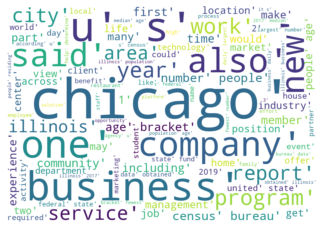

In [110]:
busilist = busi['text'].tolist()
busi_clean = [clean(doc).split() for doc in busilist]

wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(busi_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

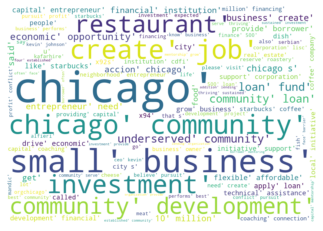

In [111]:
orglist = df_o['text'].tolist()
org_clean = [clean(doc).split() for doc in orglist]
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(org_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

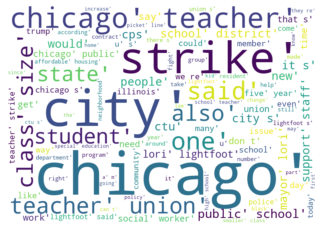

In [112]:
plist = df_p['text'].tolist()
p_clean = [clean(doc).split() for doc in plist]
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(p_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

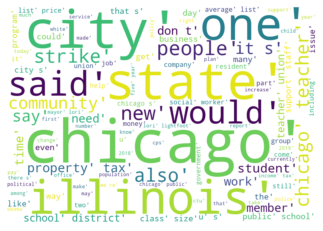

In [113]:
df2['tax'] = df2['text'].apply(lambda x: bool(re.search('[tT]ax',x)))
tax = df2[df2['tax'] == True]
taxlist = tax['text'].tolist()
tax_clean = [clean(doc).split() for doc in taxlist]
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(tax_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

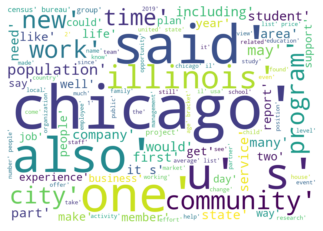

In [124]:
#df2['tax'] = df2['text'].apply(lambda x: bool(re.search('[tT]ax',x)))
#tax = df2[df2['tax'] == True]
poslist = df_pos['text'].tolist()
pos_clean = [clean(doc).split() for doc in poslist]
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(pos_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

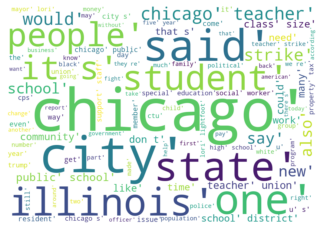

In [125]:
neglist = df_neg['text'].tolist()
neg_clean = [clean(doc).split() for doc in neglist]
wordcloud = WordCloud(background_color='white',
                      stopwords= 'english',
                      max_words=100,width = 1024,
                      height = 720,).generate(str(neg_clean))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()